# Food Demand Project : Team E (Elephants)

## Topic: Impact of income on food demand in Tanzania

## Goals: 

We will analyze the correlation between income growth, changes in consumer demand, and their impact on nutritional intake.

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(A) Estimate Demand System](#demand)

### Setup

In [1]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [2]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'
Tanzania_RuralUrban_Data = '1elpi1hGwp29UZzCd6024KyhSIay2VKFg8j0qCC_jH5U'
Tanzania_ProcessedFood_Data = '1UaFXpfQsB-VDq4MSVt2e9WoAXqc7Rmam_-u8dvcfleo'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

# Pull Tazania Expenditures from Sheets
x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
x = x[x['m'] != 'Nan'] #Remove rows with no location
x = x.astype({'i':'int64'}) 

# Reformat Expedentures databases to match structure
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns=['j'], aggfunc='first')
x = x.replace(0,np.nan) # Replace zeros with missing
x = x.reset_index(level=['m'])
x

Key available for students@eep153.iam.gserviceaccount.com.


j                           m     Beef  Bottled beer  Bread  Butter  \
i     t                                                               
1     2008-09  Mainland Rural   2500.0           NaN    NaN     NaN   
      2010-11  Mainland Rural      NaN           NaN    NaN     NaN   
      2012-13  Mainland Rural   2000.0           NaN    NaN     NaN   
      2014-15  Mainland Rural      NaN           NaN    NaN     NaN   
      2019-20  Mainland Rural   2500.0           NaN    NaN     NaN   
...                       ...      ...           ...    ...     ...   
14981 2014-15  Mainland Rural  10000.0           NaN    NaN     NaN   
14983 2014-15  Mainland Rural  10000.0           NaN    NaN     NaN   
      2020-21  Mainland Rural      NaN           NaN    NaN     NaN   
14984 2014-15  Mainland Rural   1000.0           NaN    NaN     NaN   
14985 2014-15  Mainland Rural   5000.0           NaN    NaN     NaN   

j              Canned milk/milk powder  Canned, dried and wild vegetables  \
i     t                                                                     
1     2008-09                      NaN                                NaN   
      2010-11                      NaN                                NaN   
      2012-13                      NaN                                NaN   
      2014-15                      NaN                                NaN   
      2019-20                      NaN                                NaN   
...                                ...                                ...   
14981 2014-15                      NaN                                NaN   
14983 2014-15                      NaN                                NaN   
      2020-21                      NaN                                NaN   
14984 2014-15                      NaN                                NaN   
14985 2014-15                      NaN                                NaN   

j              Cassava dry/flour  Cassava fresh  Chicken  ...  \
i     t                                                   ...   
1     2008-09                NaN            NaN      NaN  ...   
      2010-11                NaN            NaN      NaN  ...   
      2012-13                NaN            NaN      NaN  ...   
      2014-15                NaN            NaN      NaN  ...   
      2019-20                NaN            NaN      NaN  ...   
...                          ...            ...      ...  ...   
14981 2014-15                NaN            NaN      NaN  ...   
14983 2014-15                NaN            NaN      NaN  ...   
      2020-21                NaN            NaN      NaN  ...   
14984 2014-15                NaN            NaN      NaN  ...   
14985 2014-15                NaN            NaN      NaN  ...   

j              Wheat, barley, other grains  Wild birds and insects  \
i     t                                                              
1     2008-09                          NaN                     NaN   
      2010-11                          NaN                     NaN   
      2012-13                          NaN                     NaN   
      2014-15                          NaN                     NaN   
      2019-20                          NaN                     NaN   
...                                    ...                     ...   
14981 2014-15                          NaN                     NaN   
14983 2014-15                          NaN                     NaN   
      2020-21                          NaN                     NaN   
14984 2014-15                          NaN                     NaN   
14985 2014-15                          NaN                     NaN   

j              Wine and spirits  Yams/cocoyams  bread  eggs   salt  sugar  \
i     t                                                                     
1     2008-09               NaN            NaN    NaN   NaN    NaN    NaN   
      2010-11               NaN            NaN    NaN   NaN    NaN    NaN   
      201

In [4]:
# Use to match round to year structure of Expenditures
t_map = {1: '2008-09', 2:'2010-11', 3: '2012-13', 4:'2014-15'}

# Pull additional processed food expenditures
x_processed = read_sheets(Tanzania_ProcessedFood_Data,sheet='upd4_hh_f.dta') 
x_processed = x_processed.replace({"round": t_map}) # Apply mapping
x_processed = x_processed.rename(columns={'round':'t'})
x_processed = x_processed.set_index(['i','t'])
x_processed.columns.name = 'j'
x_processed

Key available for students@eep153.iam.gserviceaccount.com.


j              Barbequed meat, chips, roast bananas  kibuku, local brews  \
i     t                                                                    
1     2008-09                                   NaN                  NaN   
      2010-11                                   NaN                  NaN   
      2012-13                                   NaN                  NaN   
      2014-15                                   NaN                  NaN   
2     2008-09                                   NaN                  NaN   
...                                             ...                  ...   
45392 2014-15                                   NaN                  NaN   
45393 2014-15                                   NaN                  NaN   
45394 2014-15                                   NaN                  NaN   
45395 2014-15                                   NaN                  NaN   
45396 2014-15                                   NaN                  NaN   

j              wine, commercial beer, spirits  \
i     t                                         
1     2008-09                             NaN   
      2010-11                             NaN   
      2012-13                             NaN   
      2014-15                             NaN   
2     2008-09                             NaN   
...                                       ...   
45392 2014-15                             NaN   
45393 2014-15                             NaN   
45394 2014-15                             NaN   
45395 2014-15                             NaN   
45396 2014-15                             NaN   

j              sodas and other non-alcoholic drinks  sweets, ice cream  \
i     t                                                                  
1     2008-09                                   NaN                NaN   
      2010-11                                   NaN                NaN   
      2012-13                                   NaN                NaN   
      2014-15                                   NaN                NaN   
2     2008-09                                   NaN                NaN   
...                                             ...                ...   
45392 2014-15                                   NaN                NaN   
45393 2014-15                                   NaN                NaN   
45394 2014-15                                   NaN                NaN   
45395 2014-15                                   NaN                NaN   
45396 2014-15                                   NaN                NaN   

j              tea, coffee, samosa, cake  
i     t                                   
1     2008-09                        NaN  
      2010-11                        NaN  
      2012-13                        NaN  
      2014-15                        NaN  
2     2008-09                        NaN  
...                                  ...  
45392 2014-15                        NaN  
45393 2014-15                        NaN  
45394 2014-15                        NaN  
45395 2014-15                        NaN  
45396 2014-15                        NaN  

[83706 rows x 6 columns]

In [5]:
# Merge Processed Food Expenditures with Expenditures sheet
x = pd.merge(x, x_processed, on=['i','t'], how="left")
x = x.reset_index().set_index(['i','t','m'])
x

j                                Beef  Bottled beer  Bread  Butter  \
i     t       m                                                      
1     2008-09 Mainland Rural   2500.0           NaN    NaN     NaN   
      2010-11 Mainland Rural      NaN           NaN    NaN     NaN   
      2012-13 Mainland Rural   2000.0           NaN    NaN     NaN   
      2014-15 Mainland Rural      NaN           NaN    NaN     NaN   
      2019-20 Mainland Rural   2500.0           NaN    NaN     NaN   
...                               ...           ...    ...     ...   
14981 2014-15 Mainland Rural  10000.0           NaN    NaN     NaN   
14983 2014-15 Mainland Rural  10000.0           NaN    NaN     NaN   
      2020-21 Mainland Rural      NaN           NaN    NaN     NaN   
14984 2014-15 Mainland Rural   1000.0           NaN    NaN     NaN   
14985 2014-15 Mainland Rural   5000.0           NaN    NaN     NaN   

j                             Canned milk/milk powder  \
i     t       m                                         
1     2008-09 Mainland Rural                      NaN   
      2010-11 Mainland Rural                      NaN   
      2012-13 Mainland Rural                      NaN   
      2014-15 Mainland Rural                      NaN   
      2019-20 Mainland Rural                      NaN   
...                                               ...   
14981 2014-15 Mainland Rural                      NaN   
14983 2014-15 Mainland Rural                      NaN   
      2020-21 Mainland Rural                      NaN   
14984 2014-15 Mainland Rural                      NaN   
14985 2014-15 Mainland Rural                      NaN   

j                             Canned, dried and wild vegetables  \
i     t       m                                                   
1     2008-09 Mainland Rural                                NaN   
      2010-11 Mainland Rural                                NaN   
      2012-13 Mainland Rural                                NaN   
      2014-15 Mainland Rural                                NaN   
      2019-20 Mainland Rural                                NaN   
...                                                         ...   
14981 2014-15 Mainland Rural                                NaN   
14983 2014-15 Mainland Rural                                NaN   
      2020-21 Mainland Rural                                NaN   
14984 2014-15 Mainland Rural                                NaN   
14985 2014-15 Mainland Rural                                NaN   

j                             Cassava dry/flour  Cassava fresh  Chicken  \
i     t       m                                                           
1     2008-09 Mainland Rural                NaN            NaN      NaN   
      2010-11 Mainland Rural                NaN            NaN      NaN   
      2012-13 Mainland Rural                NaN            NaN      NaN   
      2014-15 Mainland Rural                NaN            NaN      NaN   
      2019-20 Mainland Rural                NaN            NaN      NaN   
...                                         ...            ...      ...   
14981 2014-15 Mainland Rural                NaN            NaN      NaN   
14983 2014-15 Mainland Rural                NaN            NaN      NaN   
      2020-21 Mainland Rural                NaN            NaN      NaN   
14984 2014-15 Mainland Rural                NaN            NaN      NaN   
14985 2014-15 Mainland Rural                NaN            NaN      NaN   

j                             Citrus fruits  ...   salt  sugar  sugarcane  \
i     t       m                              ...                            
1     2008-09 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2010-11 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2012-13 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2014-15 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2019-20 Mainland Rural         

In [6]:
# Take logs of expenditures; call this y
y = np.log(x)

# Change 'Tanzania' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'
d = d[d['m'] != 'Nan']
d = d.astype({'i':'int64'})

d.set_index(['i','t','m'],inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

In [8]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
  2019-20 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
  2019-20 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
  2019-20 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
  2019-20 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...  salt  sugar  sugarcane  sweets  \
i t       m                              ...                                   
1 2008-09 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2010-11 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2012-13 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2014-15 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2019-20 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   

j                         Barbequed meat, chips, roast bananas  \
i t       m                                                      
1 2008-09 Mainland Rural                                   NaN   
  2010-11 Mainland Rural                                   NaN   
  2012-13 Mainland Rural                                   NaN   
  2014-15 Mainland Rural                                   NaN   
  2019-20 Mainland Rural                                   NaN   

j                         kibuku, local brews  wine, commercial beer, spirits  \
i t       m                                                                     
1 2008-09 Mainland Rural                  NaN                             NaN   
  2010-11 Mainland Rural                  NaN                             NaN   
  2012-13 Mainland Rural                  NaN                             NaN   
  2014-15 Mainland Rural                  NaN                             NaN   
  2019-20 Mainland Rural                  NaN                             NaN   

j                         sodas and other non-alcoholic drinks  \
i t       m                                                      
1 2008-09 Mainland Rural                                   NaN   
  2010-11 Mainland Rural                                   NaN   
  2012-13 Mainland Rural                                   NaN   
  2014-15 Mainland Rural                                   NaN   
  2019-20 Mainland Rural                                   NaN   

j                         sweets, ice cream  tea, coffee, samosa, cake  
i t       m                                                             
1 2008-09 Mainlan

In [9]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=17)

Missing dependencies for OracleDemands.


In [10]:
use = y.index.intersection(d.index)

y = y.loc[use,:]

d = d.loc[use,:]

## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [11]:
y = y.stack()

d = d.stack()

# Remove duplicate indexes
idx = np.unique(d.index.values, return_index = True)[1]
d = d.iloc[idx] 

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [12]:
import cfe
result = cfe.Regression(y=y,d=d,min_obs=17,min_prop_items=0,alltm=False)

In [13]:
result.predicted_expenditures()

i      t        m               j                
1      2012-13  Mainland Rural  Beef                 2543.787239
                                Bread                1177.125809
                                Cassava dry/flour    3548.537178
                                Cassava fresh        1756.879387
                                Chicken              3560.579521
                                                        ...     
14983  2020-21  Mainland Rural  Sugarcane                    NaN
                                Sweet potatoes       2050.837246
                                Sweets                       NaN
                                Tea (dry)             329.932236
                                Wheat (flour)        3541.155811
Length: 297453, dtype: float64

<IPython.core.display.Javascript object>


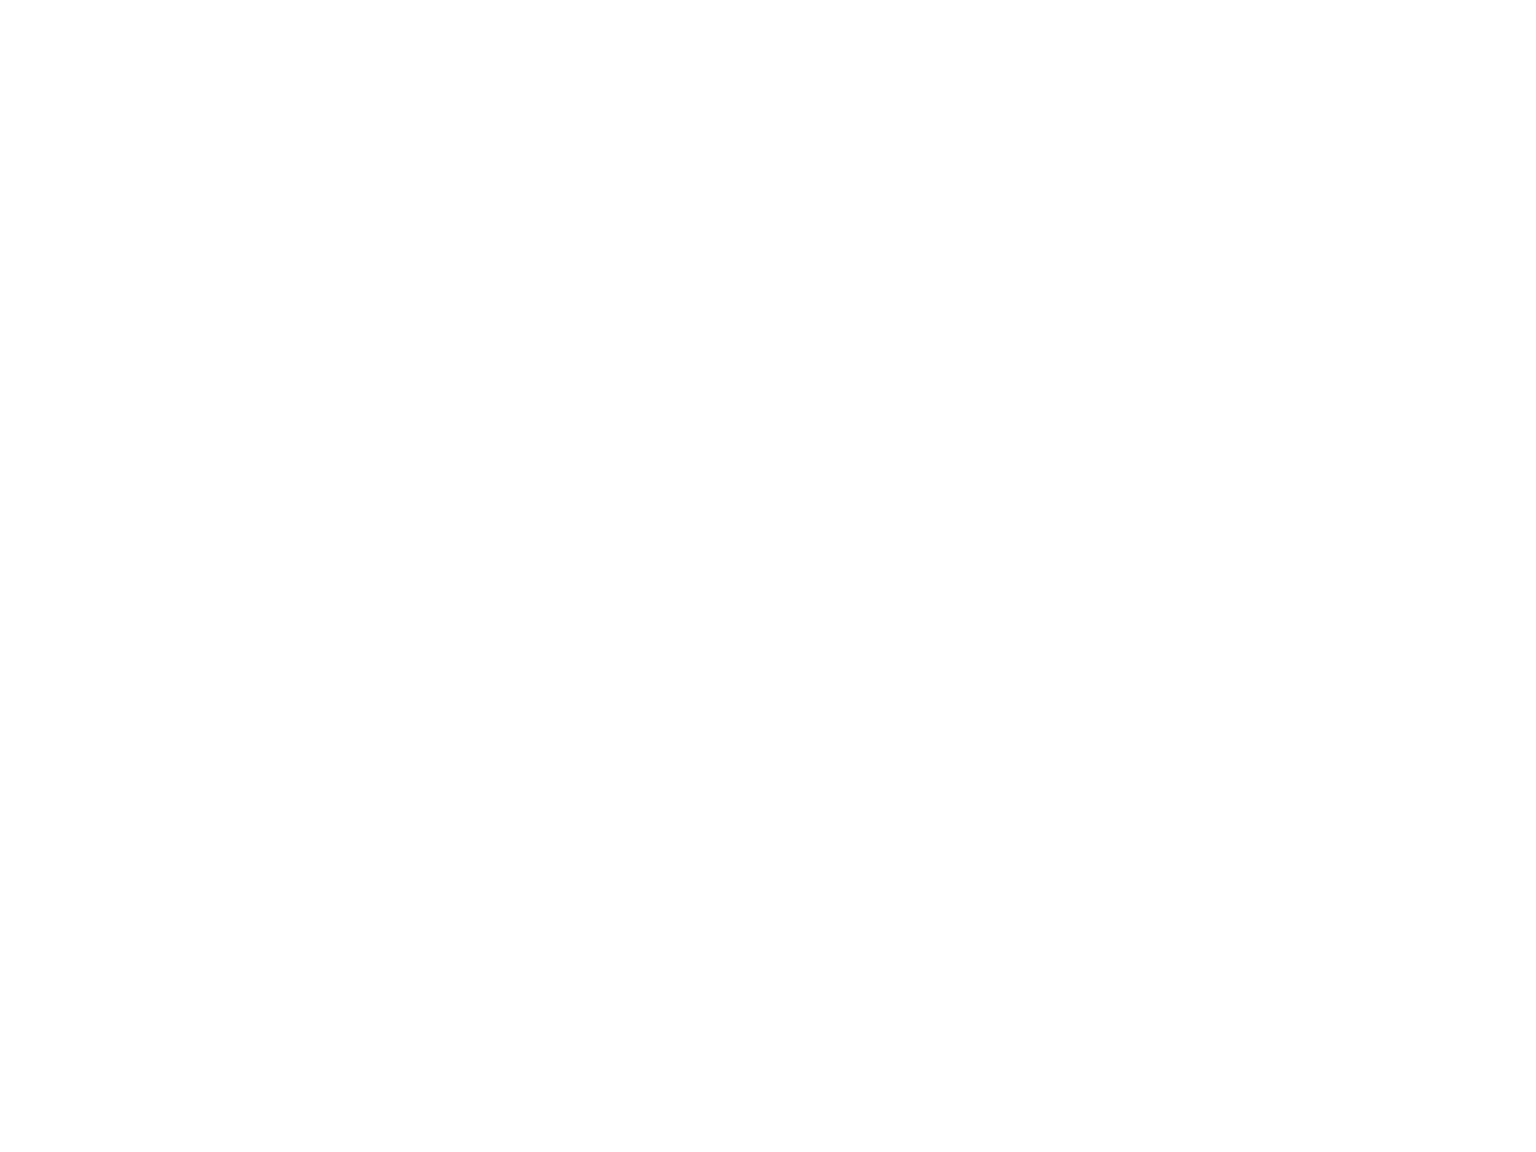

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [14]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters

### (Relative) Income Elasticity

In [15]:
result.get_beta().sort_values()

j
Maize (grain)                                            -0.064758
Cassava dry/flour                                         0.042128
Maize (flour)                                             0.082685
Salt                                                      0.187100
Millet and sorghum (flour)                                0.256018
Tea (dry)                                                 0.275053
Maize (green, cob)                                        0.319368
Cassava fresh                                             0.366788
Pasta                                                     0.369140
Sweet potatoes                                            0.391874
Sugar                                                     0.408617
Coconuts                                                  0.421670
Sugarcane                                                 0.450802
Peas, beans, lentils and other pulses                     0.454066
Wheat (flour)                                             0.

<IPython.core.display.Javascript object>


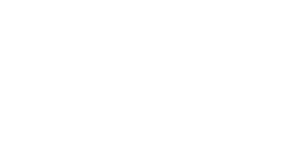

<IPython.core.display.Javascript object>


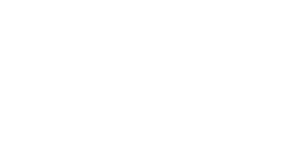

In [16]:
result.graph_beta()

### Household Composition and Estimated Demands¶

In [17]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Beef,-0.054918,-0.004704,0.008167,0.048157,0.089681,0.043877,0.040128,-0.040014,0.005107,-0.019149,0.063941,0.044996,0.147756,0.137033,0.174662,-0.069080,-0.630638
Bread,-0.013961,0.055700,0.058096,0.065807,0.086512,0.049686,0.049068,-0.012861,0.035252,0.056623,0.077707,0.097974,0.122985,0.109936,0.160174,-0.106812,-0.737277
Cassava dry/flour,0.022223,0.087995,0.023774,-0.017801,0.027733,-0.060015,0.083952,-0.009214,-0.018834,-0.043411,0.076643,0.010437,0.122300,0.121287,0.406026,-0.055842,-0.896454
Cassava fresh,0.058152,0.043094,0.127634,0.006525,0.040655,-0.017808,0.150242,0.014395,0.034713,0.092295,0.086815,0.103517,0.055543,0.147013,-0.011216,-0.065209,-0.383153
Chicken,-0.118613,0.054367,0.001819,0.034698,0.033202,0.059173,0.098396,-0.011953,-0.000081,-0.047979,0.053804,0.039853,0.042304,0.070571,0.222791,-0.043365,-0.657038
Citrus fruits,-0.024515,-0.073270,-0.023176,0.008071,0.023276,0.006925,-0.026536,-0.063781,-0.078941,0.050315,-0.019709,0.035769,0.067272,-0.034804,0.408953,-0.070976,-0.779527
Coconuts,0.058533,0.061535,0.036044,0.056484,0.050182,0.017901,0.067264,0.026827,0.069718,0.080844,0.036233,0.070183,0.099113,0.081929,0.006783,-0.081011,-0.397949
Cooking oil,-0.024590,0.002799,0.003027,0.070602,0.114303,0.072965,-0.014643,-0.058531,0.005983,0.026507,0.057500,0.057498,0.116741,0.057022,0.126531,-0.019388,-0.484683
Dairy,-0.034505,0.099118,0.000147,0.109719,0.019999,-0.126711,0.025380,0.058806,-0.019461,-0.016449,0.196557,-0.102023,0.110205,0.140702,0.072226,-0.071625,-0.308031


In [18]:
r = result
xhat = r.predicted_expenditures()
# Implied relative prices
p = np.exp(r.get_Ar())

/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


<IPython.core.display.Javascript object>


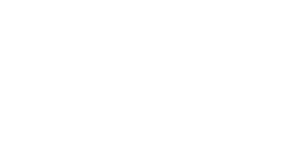

Text(0.5, 0, 'Quantities of Soft drinks Demanded')

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'Soft drinks'
scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('2019-20',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Soft drinks'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p

# Demand for Soft drinks for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Soft drinks for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Soft drinks for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

In [20]:
#Using observed prices from 2019-2020 for reference, we can see 
#large differences in demand between households at 25% percentile, median budget, 
#and the 75% percentile. 

<IPython.core.display.Javascript object>


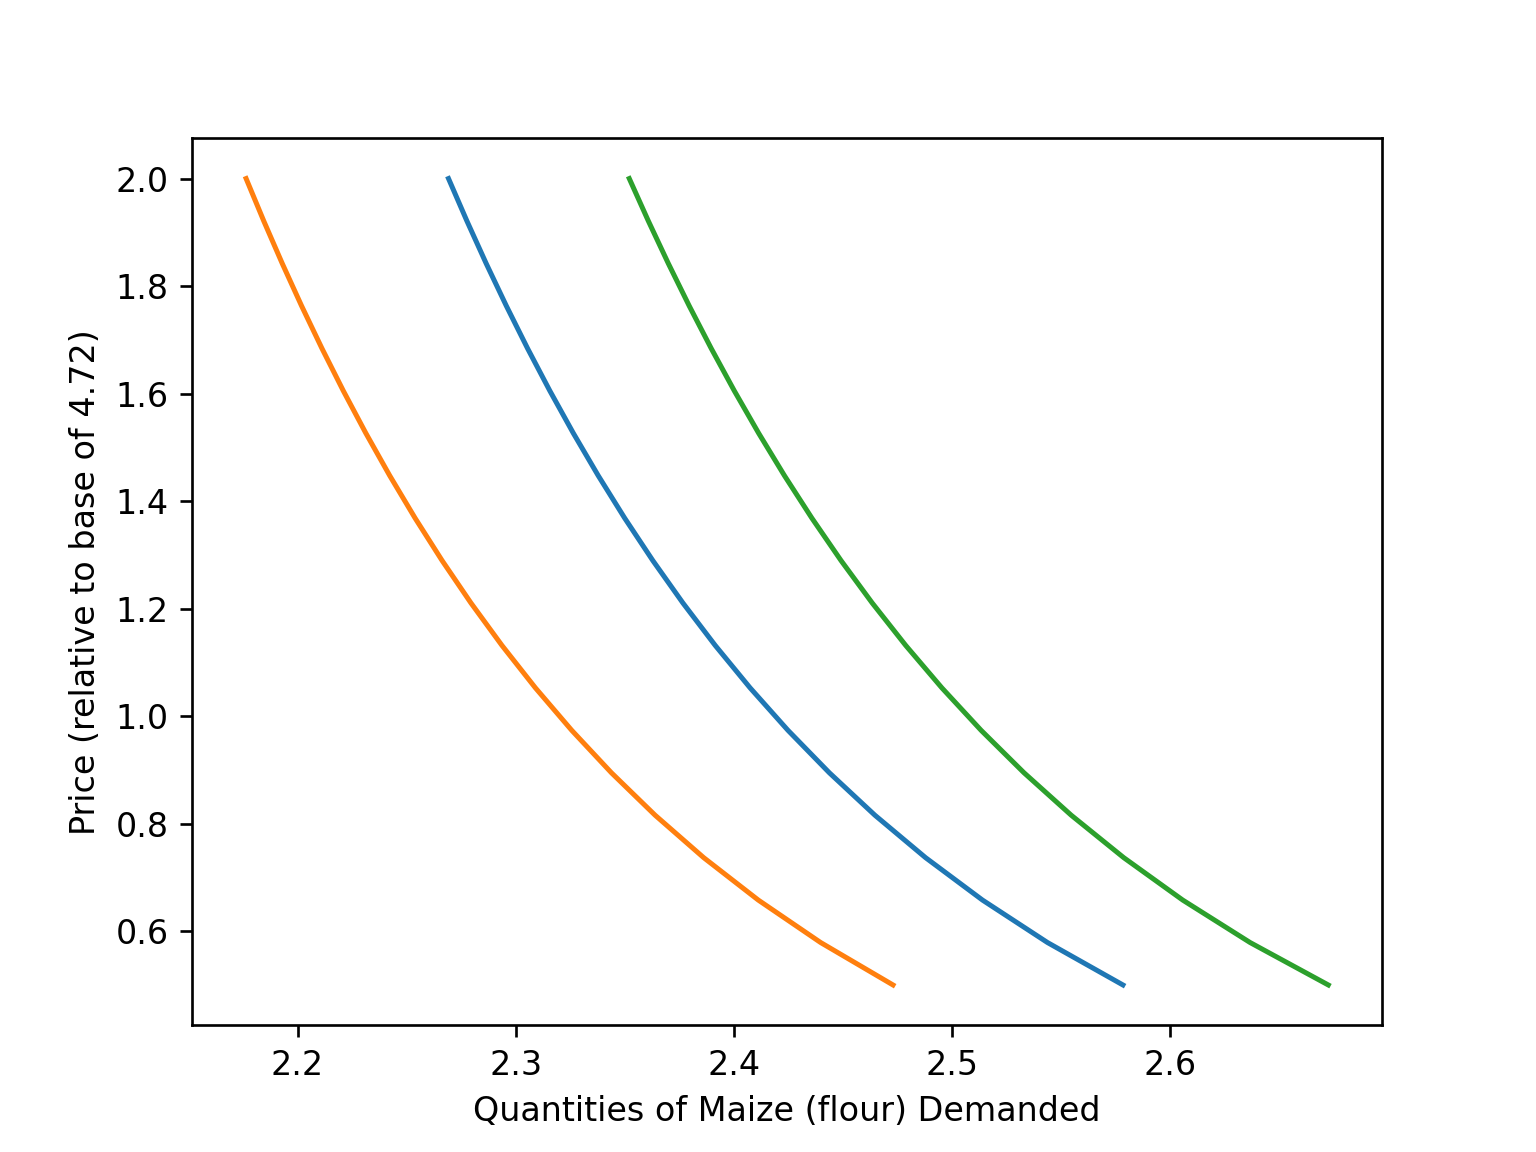

Text(0.5, 0, 'Quantities of Maize (flour) Demanded')

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook 

use = 'Maize (flour)'
scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('2019-20',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Maize (flour)'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p

# Demand for Maize (flour) for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Maize (flour) for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Maize (flour) for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

In [22]:
#When looking at Maize (flour) however, we can see differences in demand from households 
#at 25% percentile, median budget, and the 75% percentile do not differ as widely. 

In [23]:
r.demands(20000,pbar).index.tolist()

['Beef',
 'Bread',
 'Cassava dry/flour',
 'Cassava fresh',
 'Chicken',
 'Citrus fruits',
 'Coconuts',
 'Cooking oil',
 'Dairy',
 'Dried/salted/canned fish',
 'Eggs',
 'Fresh fish',
 'Fresh milk',
 'Goat meat',
 'Groundnuts',
 'Honey, syrups, jams, marmalade, jellies, canned fruits',
 'Irish potatoes',
 'Maize (flour)',
 'Maize (grain)',
 'Maize (green, cob)',
 'Mangoes',
 'Millet and sorghum (flour)',
 'Onions, tomatoes, carrots, green pepper, other viungo',
 'Other spices',
 'Pasta',
 'Pastries',
 'Peas, beans, lentils and other pulses',
 'Plantains',
 'Rice (husked)',
 'Ripe bananas',
 'Salt',
 'Soft drinks',
 'Spinach, cabbage, other green vegetables',
 'Sugar',
 'Sugarcane',
 'Sweet potatoes',
 'Sweets',
 'Tea (dry)',
 'Wheat (flour)']

<IPython.core.display.Javascript object>


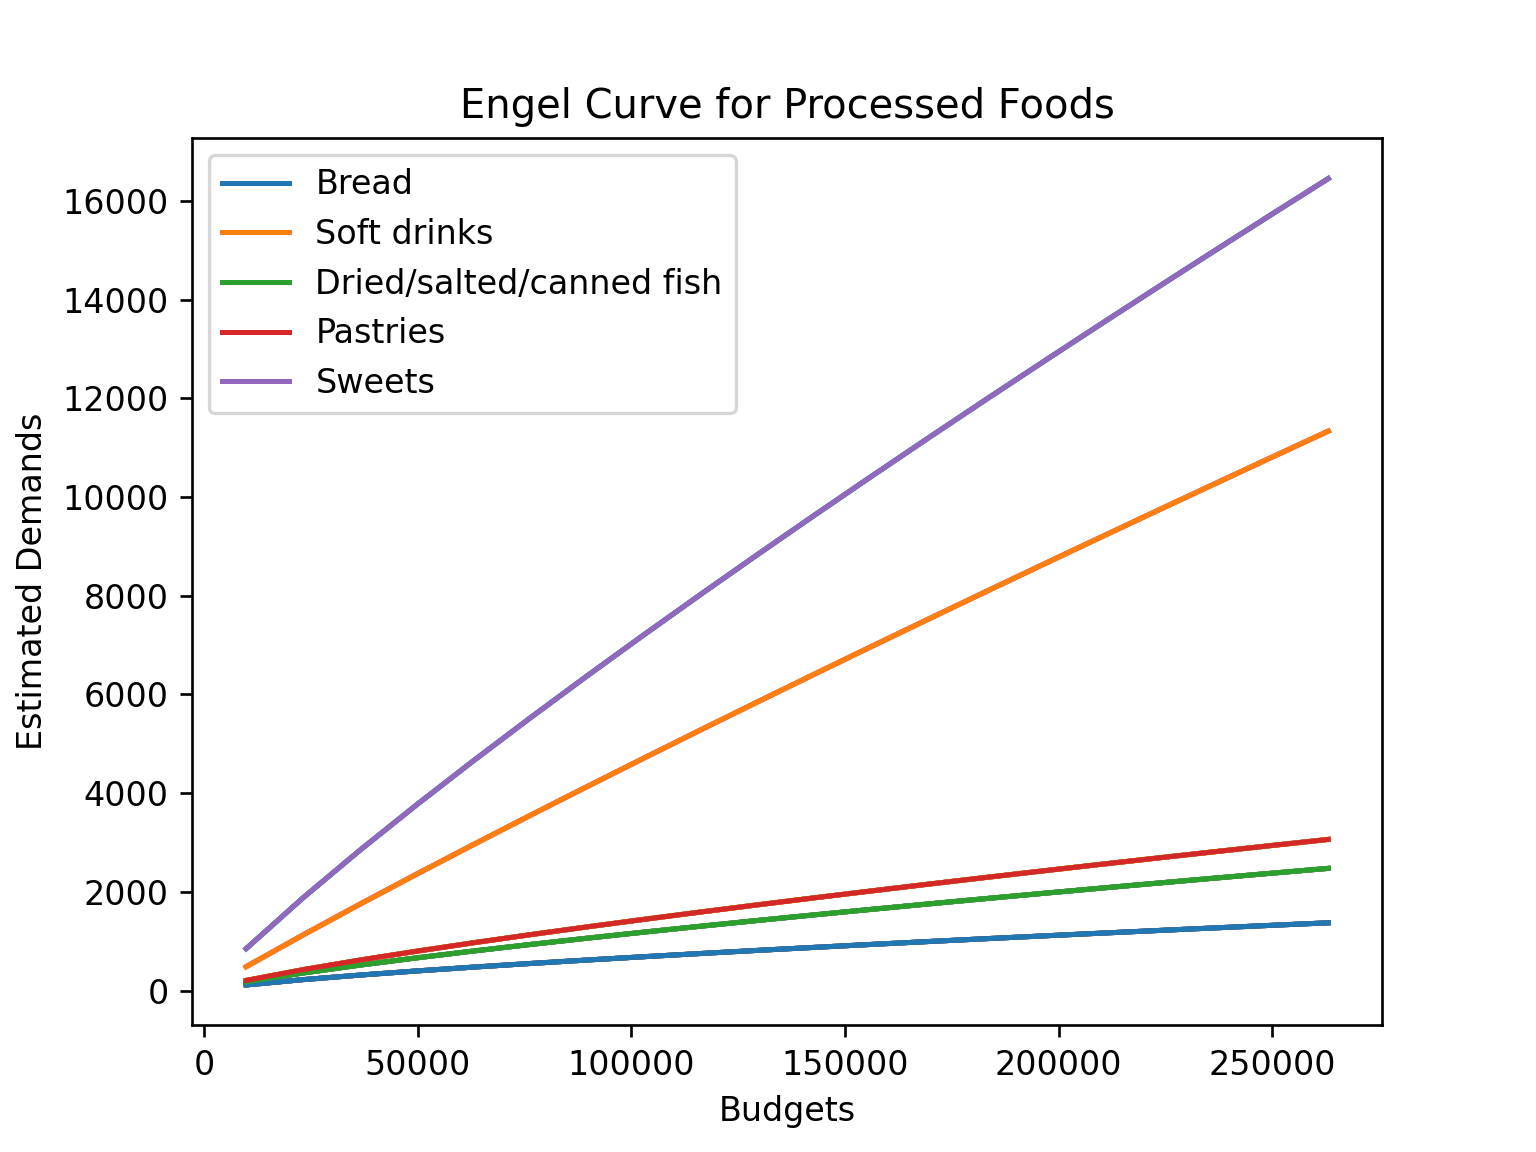

/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Set

Text(0.5, 1.0, 'Engel Curve for Processed Foods')

In [24]:
fig,ax = plt.subplots()

use = ['Bread','Soft drinks','Dried/salted/canned fish','Pastries','Sweets']

X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

for f in use:
    # Different budgets to evaluate demands at.

    ax.plot(X,[r.demands(x,pbar)[use] for x in X])
    
ax.legend(use)
ax.set_xlabel('Budgets')
ax.set_ylabel('Estimated Demands')
ax.set_title('Engel Curve for Processed Foods' )

In [25]:
#Above we plot Engel curves (demand vs. budget) for processed goods. We see demand for
#bread and soft drink increase much more than other goods we defined as processed.

<IPython.core.display.Javascript object>


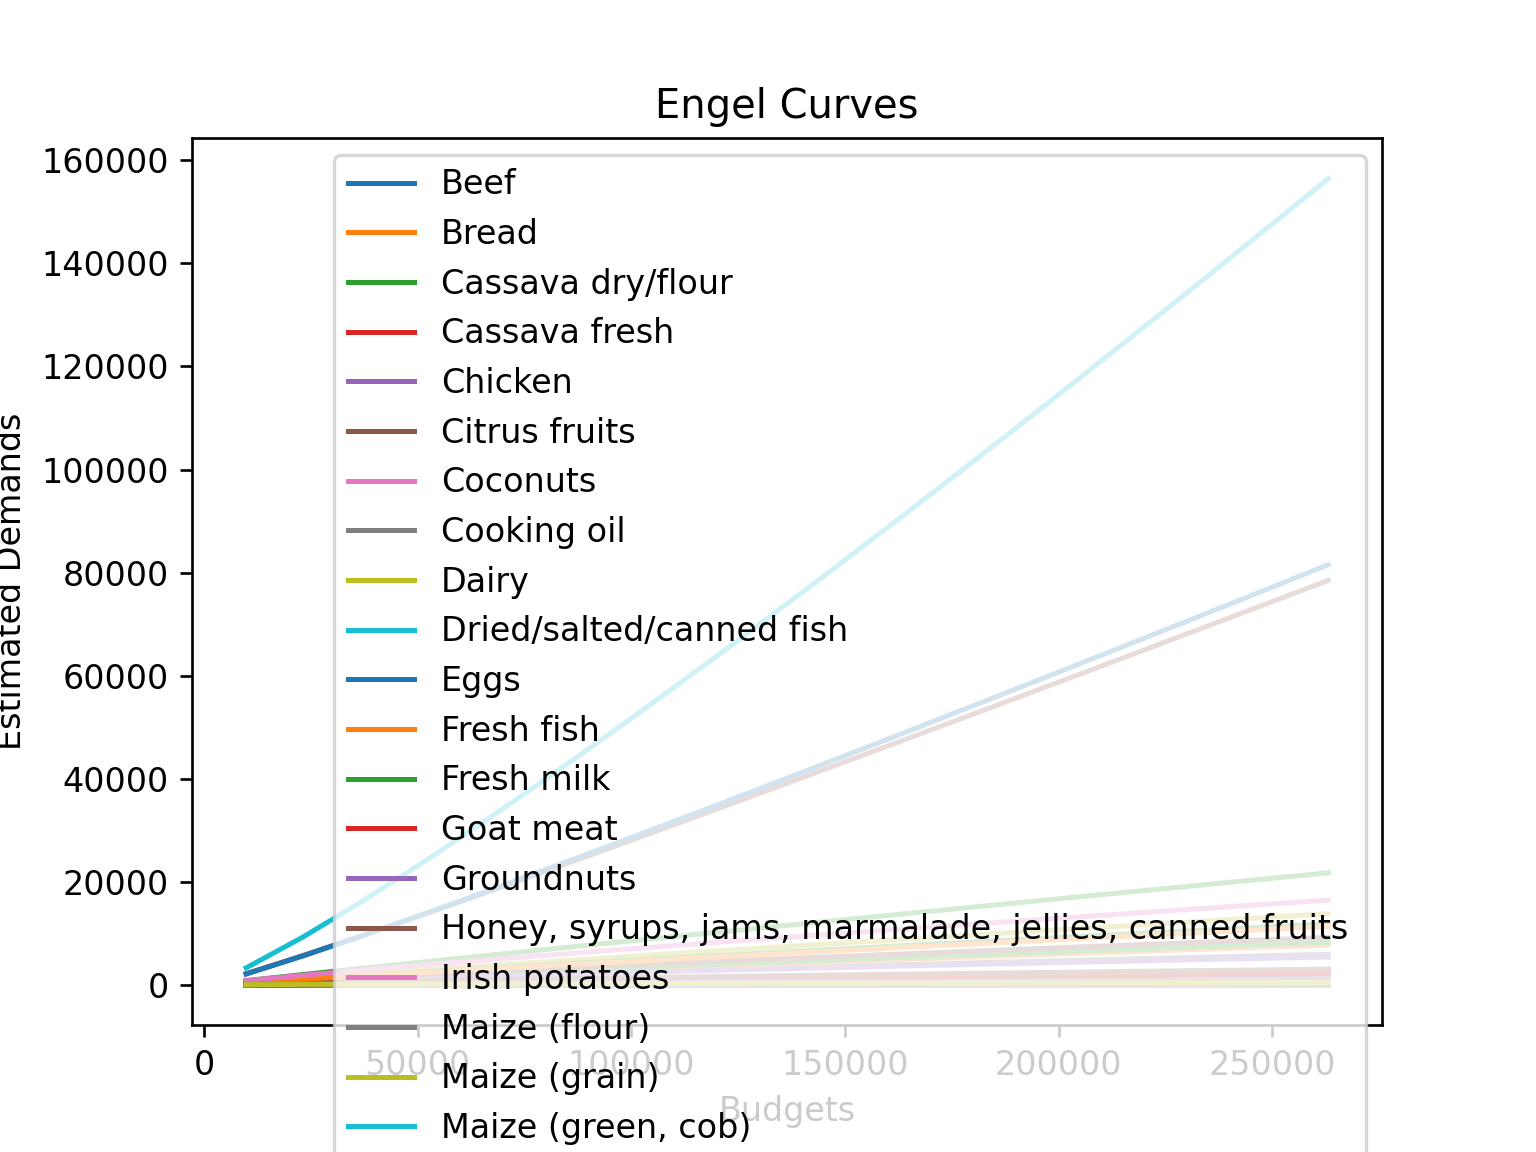

/opt/conda/lib/python3.9/site-packages/consumerdemands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


Text(0.5, 1.0, 'Engel Curves')

In [26]:
fig,ax = plt.subplots()

# Different budgets to evaluate demands at.
X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

ax.plot(X,[r.demands(x,pbar) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())
ax.set_xlabel('Budgets')
ax.set_ylabel('Estimated Demands')
ax.set_title('Engel Curves')

In [27]:
#Above we plot Engel curves (demand vs. budget) for all other goods included in our data 
#Here, we see demand for beef dominating when bugets increase. 